In [1]:
import muon as mu
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import scanpy as sc

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/si

In [2]:
coor_matrix=pd.read_csv("../process_data/trajMap/pearsonAll.csv",index_col=0)
maxAllDf=pd.read_csv("../process_data/trajMap/maxAllDf.csv",index_col=0)
sumAllDf=pd.read_csv("../process_data/trajMap/sumAllDf.csv",index_col=0)

In [49]:
coor_matrix_bk=pd.read_csv("../process_data/trajMap/pearsonAll.csv",index_col=0)

In [5]:
travMatrix=pd.read_csv("../process_data/trajMap/1.10_validation_df.csv",index_col=0)

In [8]:
trajName=travMatrix.columns

In [9]:
attr1=[s.split("_sep_")[0] for s in trajName]
attr2=[s.split("_sep_")[1] for s in trajName]

In [11]:
attr3=[s.split("_sep_")[0] for s in coor_matrix.columns]
attr4=[s.split("_sep_")[1] for s in coor_matrix.columns]

In [91]:
extendMeta=pd.read_csv("../../important_processed_data/24.1.7_extendAtlasObs.csv",index_col=0)

/tmp/ipykernel_3381676/3408913180.py:1: DtypeWarning: Columns (16,17,18,19,21,22,28,29,30,31,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  extendMeta=pd.read_csv("../../important_processed_data/24.1.7_extendAtlasObs.csv",index_col=0)


In [94]:
reference=sc.read_h5ad("../../important_processed_data/24.1.6_reflatendLineage.h5ad")

In [165]:
reference

AnnData object with n_obs × n_vars = 430556 × 15
    obs: 'Sample', 'Project', 'Core Dataset', 'Limb Atlas', 'Cranial Atlas', 'Organ', 'Tissue', 'Tissue(Specific)', 'Stage', 'Gene type', 'Treatment', 'Age', 'Age(In Detail)', 'Machine', 'Species', 'Isolation approach', 'Digestion', 'Enzymes', 'Cre', 'Bone Forming Methods', 'Data Source', 'Related Assay', 'Cell Count After QC', 'Origin', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'nCount_originalexp', 'nFeature_originalexp', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log', 'batch', '_scvi_batch', 'scanvi_label', '_scvi_labels', 'leiden', 'pred_anno', 'reject', 'pred_anno7', 'pred_anno19', 'pred_anno36', 'pred_anno49', 'pred_anno90', 'leiden_clusters_0.001', 'leiden_clusters_0.005', 'leide

In [96]:
extendMeta=reference.obs

In [99]:
aggdict={"Core_or_Extand":"first"}
coreDf=extendMeta.groupby("Sample").agg(aggdict)

In [164]:
adata

NameError: name 'adata' is not defined

In [15]:
set(attr1)

{'chondro', 'fibro', 'lepr', 'mes'}

In [13]:
set(attr4)

{'Chondro', 'Fibroblast', 'Lepr_BMSC', 'Mesenchyme'}

In [16]:
replacement_dict = {
    'chondro': 'Chondro',
    'fibro': 'Fibroblast',
    'lepr': 'Lepr_BMSC',
    'mes': 'Mesenchyme'
}

# Replace values
updated_list = [replacement_dict.get(item, item) for item in attr1]


In [22]:
result_list = [str1 +"_sep_"+ str2 for str1, str2 in zip( attr2,updated_list)]


In [34]:
travMatrix.columns=result_list

In [28]:
newName=set(result_list).intersection(set(coor_matrix.columns))

In [32]:
coor_matrix=coor_matrix[newName]
maxAllDf=maxAllDf[newName]
sumAllDf=sumAllDf[newName]


/tmp/ipykernel_3381676/1770332606.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  coor_matrix=coor_matrix[newName]
/tmp/ipykernel_3381676/1770332606.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  maxAllDf=maxAllDf[newName]
/tmp/ipykernel_3381676/1770332606.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sumAllDf=sumAllDf[newName]


In [35]:
travMatrix=travMatrix[newName]

/tmp/ipykernel_3381676/691934505.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  travMatrix=travMatrix[newName]


In [42]:
expr=ad.AnnData(sumAllDf.T)
peak=ad.AnnData(maxAllDf.T)
coor=ad.AnnData(coor_matrix.T)

trav=ad.AnnData(travMatrix.T)

/tmp/ipykernel_3381676/2356842396.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  expr=ad.AnnData(sumAllDf.T)
/tmp/ipykernel_3381676/2356842396.py:2: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  peak=ad.AnnData(maxAllDf.T)
/tmp/ipykernel_3381676/2356842396.py:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  coor=ad.AnnData(coor_matrix.T)
/tmp/ipykernel_3381676/2356842396.py:5: Fu

In [40]:
adata_TRAV

AnnData object with n_obs × n_vars = 274 × 534

In [43]:
trajMap=mu.MuData({"coor":coor, "expr": expr,"peak":peak,"TRAV":trav})

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [44]:
coor=trajMap["coor"]
expr=trajMap["expr"]
peak=trajMap["peak"]
trav=trajMap["TRAV"]
coor.layers["raw"]=coor.X
expr.layers["raw"]=expr.X
peak.layers["raw"]=peak.X
trav.layers["raw"]=trav.X
sc.pp.scale(coor)
sc.pp.scale(expr)
sc.pp.scale(peak)
sc.pp.scale(trav)


In [45]:
sc.tl.pca(coor, n_comps=10, svd_solver="auto")
sc.pp.neighbors(coor, metric="cosine")
sc.tl.umap(coor)
sc.tl.pca(expr, n_comps=10, svd_solver="auto")
sc.pp.neighbors(expr, metric="cosine")
sc.tl.umap(expr)
sc.tl.pca(peak, n_comps=10, svd_solver="auto")
sc.pp.neighbors(peak, metric="cosine")
sc.tl.umap(peak)
sc.tl.pca(trav, n_comps=10, svd_solver="auto")
sc.pp.neighbors(trav, metric="cosine")
sc.tl.umap(trav)

In [46]:
sampleDf=pd.read_csv("../process_data/trajMap/trajMapMeta.csv",index_col=0)

In [112]:
sampleDf["Core_or_Extand"]="Core"

In [115]:
coreDf.loc[sampleDf["Sample.1"]]['Core_or_Extand'].values

['Core', 'Core', 'Extand', 'Core', 'Core', ..., 'Core', 'Core', 'Core', 'Extand', 'Core']
Length: 274
Categories (2, object): ['Core', 'Extand']

In [116]:
sampleDf["Core_or_Extand"]=coreDf.loc[sampleDf["Sample.1"]]['Core_or_Extand'].values

In [117]:
sampleDf["Core_or_Extand"]

Maxillary_Bian_E11.5_sep_Mesenchyme              Core
coronal_Holmes_P28_sep_Mesenchyme                Core
BmscMds_Hayashi_TG_A2_sep_Lepr_BMSC            Extand
Mandible2020_Chai_E12_sep_Mesenchyme             Core
Frontal_Holmes_WTE18.5_4_sep_Mesenchyme          Core
                                                ...  
Septoclasts_Kishor_Pdgfra_sep_Lepr_BMSC          Core
Septoclasts_Kishor_Longbone1_sep_Fibroblast      Core
lambdoid_Holmes_P10_sep_Mesenchyme               Core
BmscDiffereation_Wolock_sep_Lepr_BMSC          Extand
Mandible2020_Chai_sep_Mesenchyme                 Core
Name: Core_or_Extand, Length: 274, dtype: category
Categories (2, object): ['Core', 'Extand']

In [52]:
coor_matrix_bk.columns

Index(['Bmsc2019_Regev_samp4_sep_Chondro',
       'BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro',
       'BmscEndosteal_Ono_Prrx1creP21_sep_Chondro',
       'BmscEndosteal_Ono_Prrx1creP21multiome_sep_Chondro',
       'BmscInjury_Zhong_sep_Chondro', 'BmscPth1r_Fu_cKOVeh_sep_Chondro',
       'BmscSp7KO_Youlten_WT_sep_Chondro', 'BmscTime_Zhong_16M_sep_Chondro',
       'ChondroOsteo_Long_sep_Chondro',
       'CranioSoxc_Angelozzi_Prx1CreE17.5_sep_Chondro',
       ...
       'Periodontium_Nagata_sep_Fibroblast',
       'Septoclasts_Kishor_Con2_sep_Fibroblast',
       'Septoclasts_Kishor_Fracture1_sep_Fibroblast',
       'Septoclasts_Kishor_Fracture2_sep_Fibroblast',
       'Septoclasts_Kishor_Fracture3_sep_Fibroblast',
       'Septoclasts_Kishor_Fracture4_sep_Fibroblast',
       'Septoclasts_Kishor_Longbone1_sep_Fibroblast',
       'Septoclasts_Kishor_Longbone2_sep_Fibroblast',
       'Septoclasts_Kishor_Pdgfra_sep_Fibroblast',
       'lambdoid_Holmes_P10_sep_Fibroblast'],
      dtype='objec

In [53]:
sampleDf.index=coor_matrix_bk.columns

In [57]:
sampleDf=sampleDf.loc[newName]

/tmp/ipykernel_3381676/1804247554.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sampleDf=sampleDf.loc[newName]


In [60]:
trajMap.obs=sampleDf
coor.obs=sampleDf
trav.obs=sampleDf
expr.obs=sampleDf
peak.obs=sampleDf

In [61]:
sc.pl.umap(peak,color="Lineage")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


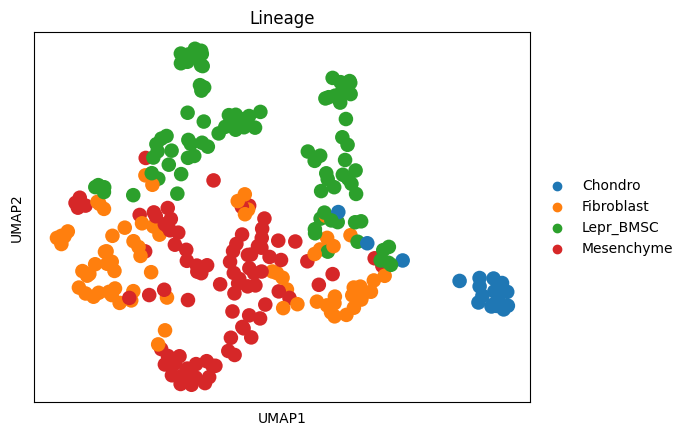

In [62]:
sc.pl.umap(coor,color="Lineage")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


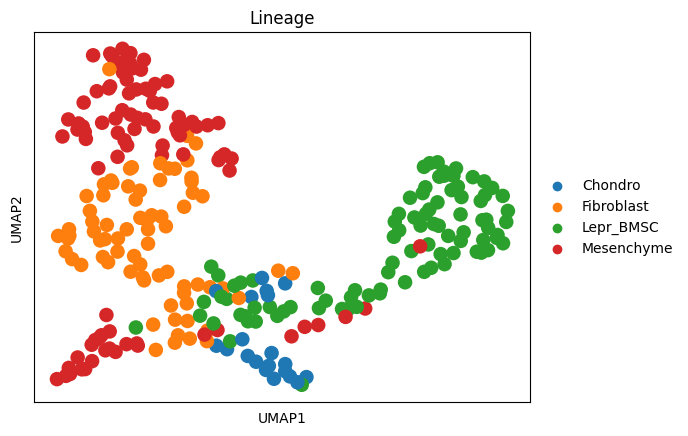

In [63]:
sc.pl.umap(trav,color="Lineage")

In [65]:
mu.pp.neighbors(trajMap,n_multineighbors=20)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/pynndescent/pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/pynndescent/pynndescent_.py:348: NumbaWarning: Cannot cache compiled function "init_random" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_random(n_neighbors, data, current_graph, dist, rng_state)
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/pynndescent/pynndescent_.py:358: NumbaWarning: Cannot cache compiled function "process_candidates" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  nn_descent_internal_low_memory_parallel(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/pynndescent/pynndescent_.py:346: NumbaWarni

In [66]:
mu.tl.umap(trajMap)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


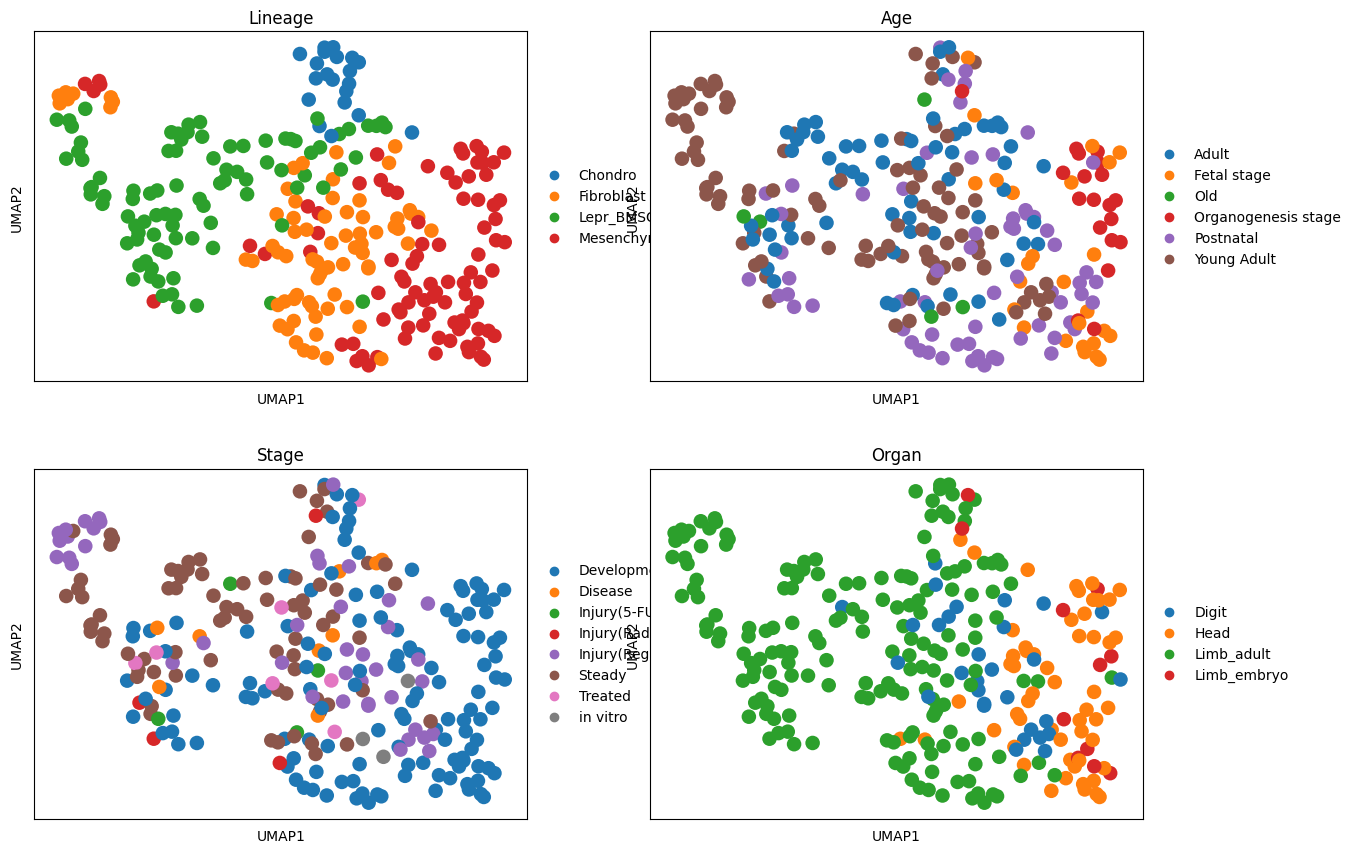

In [72]:
sc.pl.umap(trajMap,color=["Lineage","Age","Stage","Organ"],ncols=2)

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


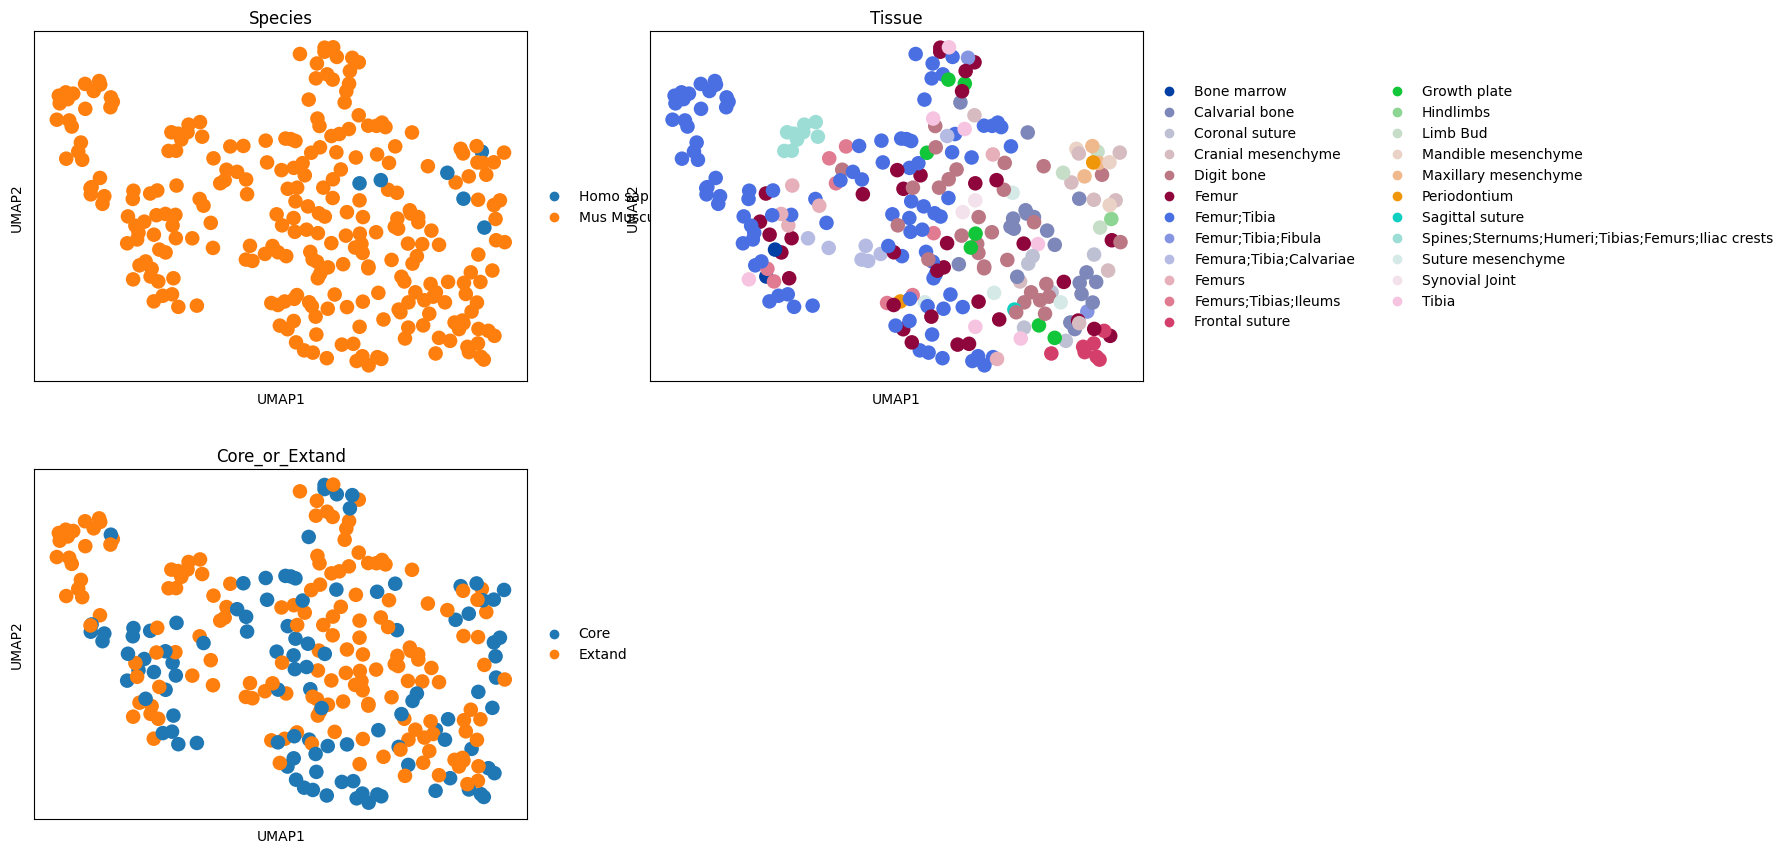

In [130]:
sc.pl.umap(trajMap,color=['Species',"Tissue","Core_or_Extand"],ncols=2)

In [127]:
trajMap.obs["Core_or_Extand"]=sampleDf["Core_or_Extand"]

In [69]:
coor.obsm["X_umap_orig"]=coor.obsm["X_umap"]

In [70]:
coor.obsm["X_umap"]=trajMap.obsm["X_umap"]

In [85]:
peak.obsm["X_umap_bk"]=peak.obsm["X_umap"]

In [86]:
peak.obsm["X_umap"]=trajMap.obsm["X_umap"]

In [89]:
expr.obsm["X_umap_bk"]=expr.obsm["X_umap"]
expr.obsm["X_umap"]=trajMap.obsm["X_umap"]

In [118]:
trav.obsm["X_umap_bk"]=trav.obsm["X_umap"]
trav.obsm["X_umap"]=trajMap.obsm["X_umap"]

In [149]:
sampleDf["Stage"]

Maxillary_Bian_E11.5_sep_Mesenchyme            Development
coronal_Holmes_P28_sep_Mesenchyme              Development
BmscMds_Hayashi_TG_A2_sep_Lepr_BMSC                Disease
Mandible2020_Chai_E12_sep_Mesenchyme           Development
Frontal_Holmes_WTE18.5_4_sep_Mesenchyme        Development
                                                  ...     
Septoclasts_Kishor_Pdgfra_sep_Lepr_BMSC        Development
Septoclasts_Kishor_Longbone1_sep_Fibroblast    Development
lambdoid_Holmes_P10_sep_Mesenchyme             Development
BmscDiffereation_Wolock_sep_Lepr_BMSC               Steady
Mandible2020_Chai_sep_Mesenchyme               Development
Name: Stage, Length: 274, dtype: category
Categories (8, object): ['Development', 'Disease', 'Injury(5-FU)', 'Injury(Radiation)', 'Injury(Regeneration)', 'Steady', 'Treated', 'in vitro']

In [155]:
import numpy as np
np.sum((sampleDf["Lineage"]=="Mesenchyme") & (sampleDf["Stage"]=="Injury(Regeneration)"))

15

In [156]:
sampleDf.index[(sampleDf["Lineage"]=="Mesenchyme") & (sampleDf["Stage"]=="Injury(Regeneration)")]

Index(['DigitLmx1b_Miller_Pdgfra_sep_Mesenchyme',
       'Digit2019_Storer_Gen14DPAcreDmp1_sep_Mesenchyme',
       'DigitRegeneration_Johnson_12dpa_sep_Mesenchyme',
       'Digit2019_Storer_Gen14DPA1_sep_Mesenchyme',
       'DigitLmx1b_Miller_Lmx1b_sep_Mesenchyme',
       'DigitRegeneration_Johnson_17dpa_sep_Mesenchyme',
       'LimbImplant_VesPrey_Tmem100_sep_Mesenchyme',
       'Septoclasts_Kishor_Fracture1_sep_Mesenchyme',
       'Septoclasts_Kishor_Fracture2_sep_Mesenchyme',
       'Septoclasts_Kishor_Fracture4_sep_Mesenchyme',
       'Septoclasts_Kishor_Fracture3_sep_Mesenchyme',
       'Digit2019_Storer_Gen28DPA_sep_Mesenchyme',
       'DigitRegeneration_Johnson_14dpa_sep_Mesenchyme',
       'DigitRegeneration_Johnson_11dpa_sep_Mesenchyme',
       'Digit2019_Storer_Gen10DPA_sep_Mesenchyme'],
      dtype='object')

In [163]:
coor

AnnData object with n_obs × n_vars = 274 × 20664
    obs: 'Organ', 'Stage', 'Age', 'Tissue', 'Tissue(Specific)', 'Gene type', 'Treatment', 'Age(In Detail)', 'Machine', 'Origin', 'Species', 'Sample.1', 'Lineage', 'coor:mod_weight', 'expr:mod_weight', 'peak:mod_weight', 'TRAV:mod_weight', 'Core_or_Extand'
    var: 'mean', 'std'
    uns: 'pca', 'neighbors', 'umap', 'Lineage_colors'
    obsm: 'X_pca', 'X_umap', 'X_umap_orig'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'distances', 'connectivities'

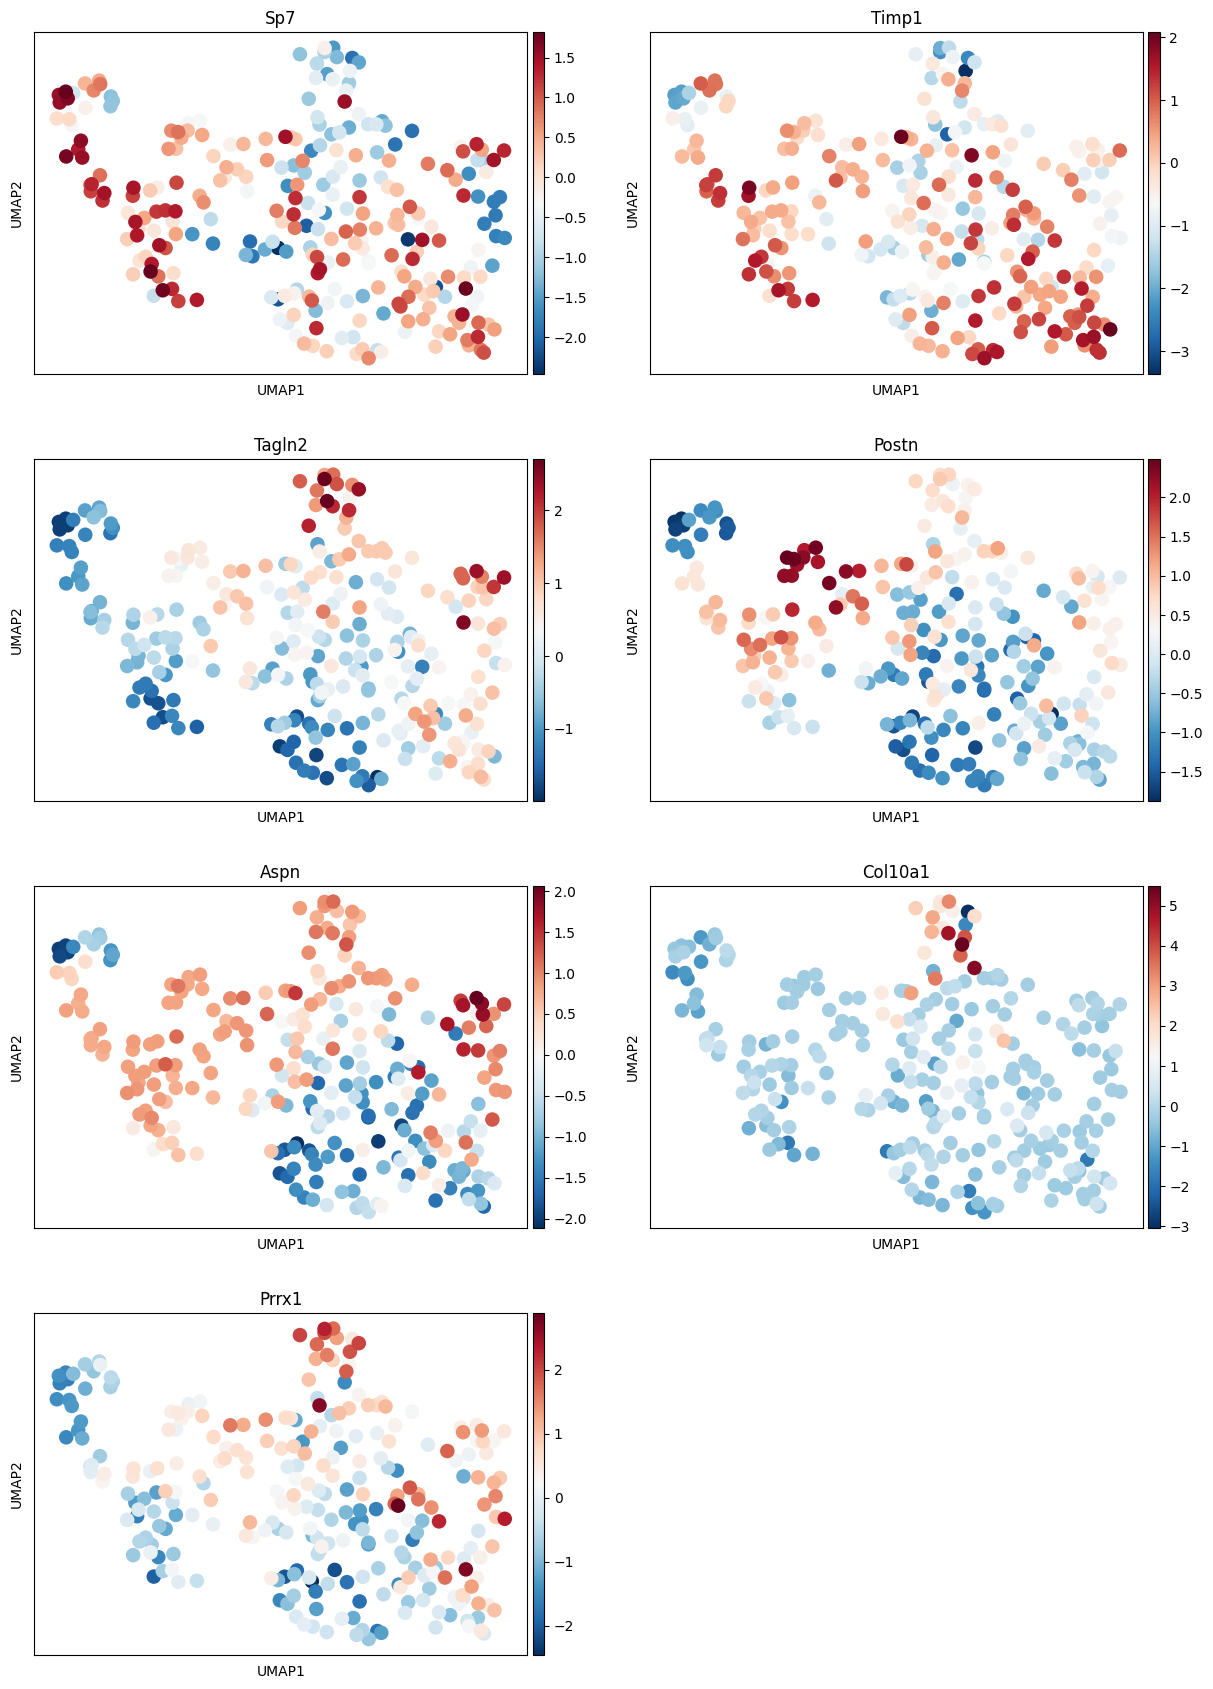

In [82]:
sc.pl.umap(coor,color=["Sp7","Timp1","Tagln2","Postn","Aspn","Col10a1","Prrx1"],ncols=2,cmap="RdBu_r")

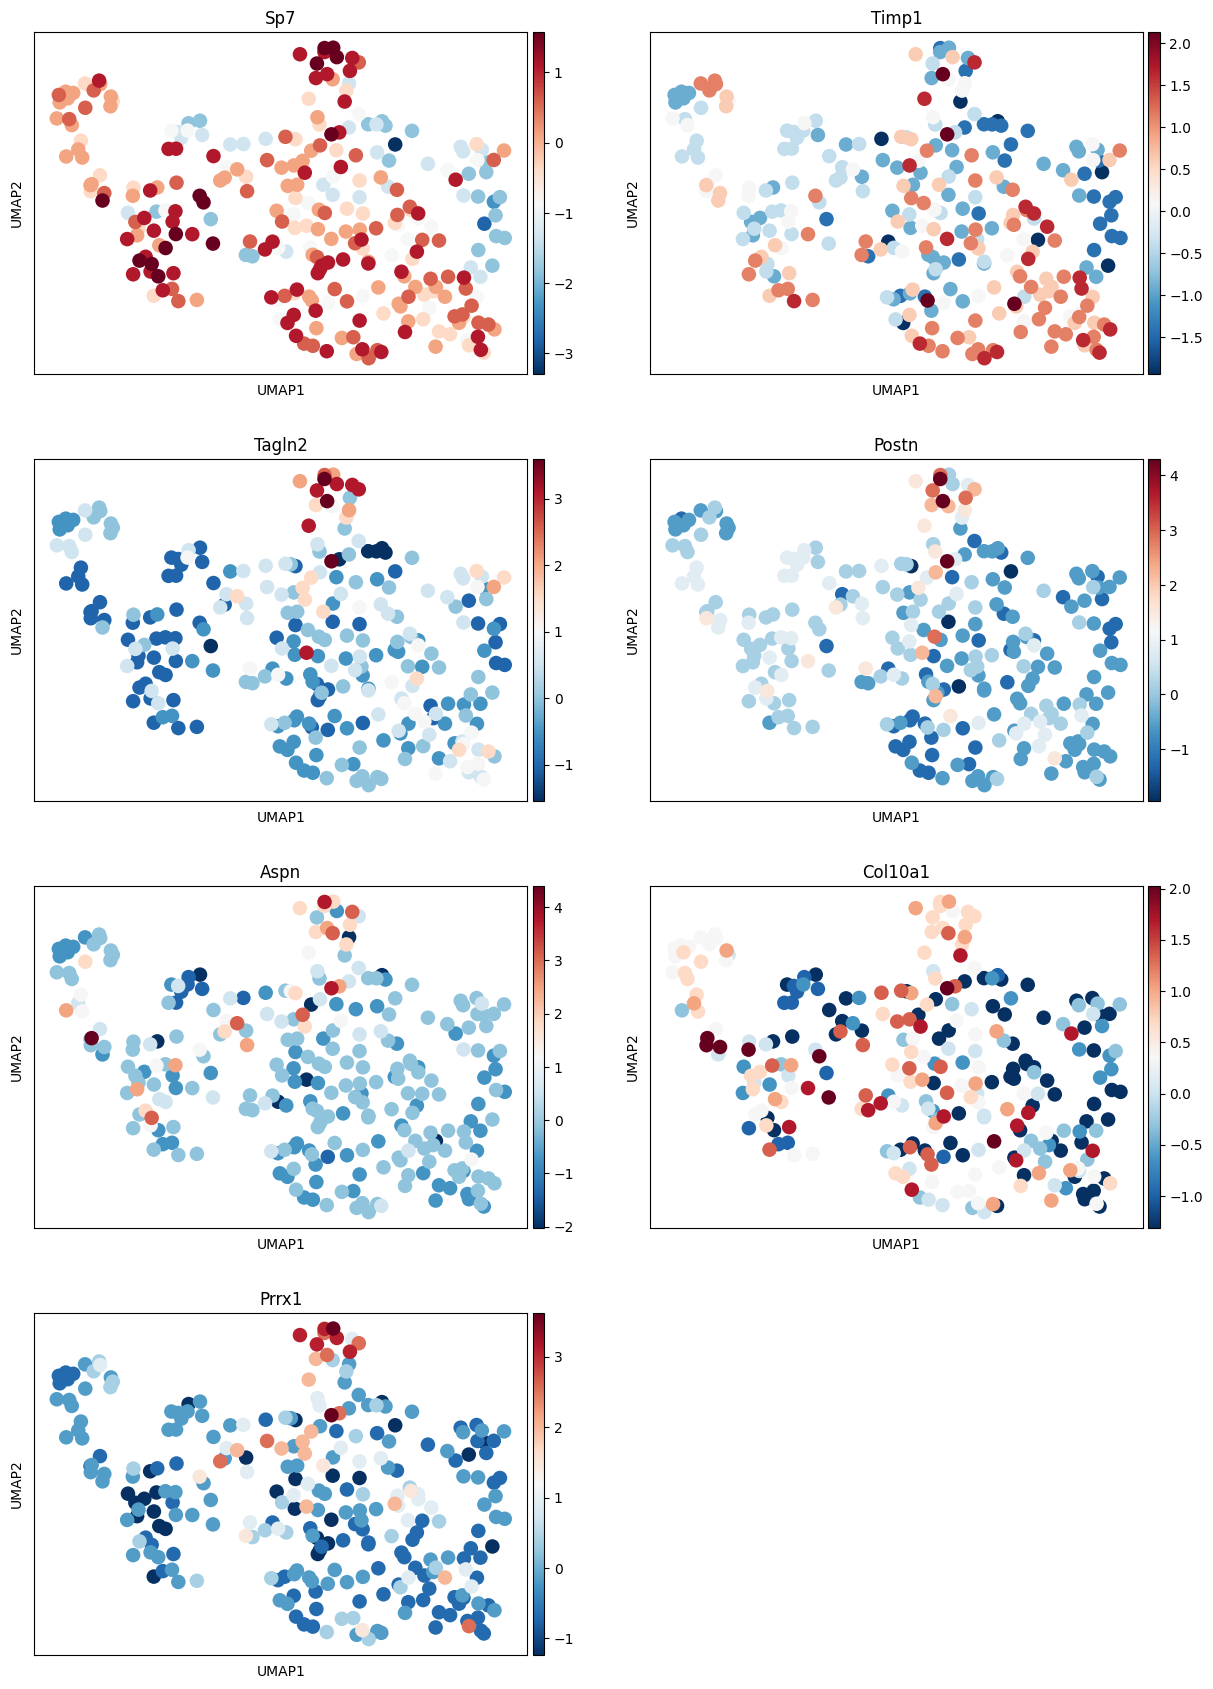

In [87]:
sc.pl.umap(peak,color=["Sp7","Timp1","Tagln2","Postn","Aspn","Col10a1","Prrx1"],ncols=2,cmap="RdBu_r")

In [88]:
trajMap.write_h5mu("../process_data/trajMap/trajMap_1.h5mu")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


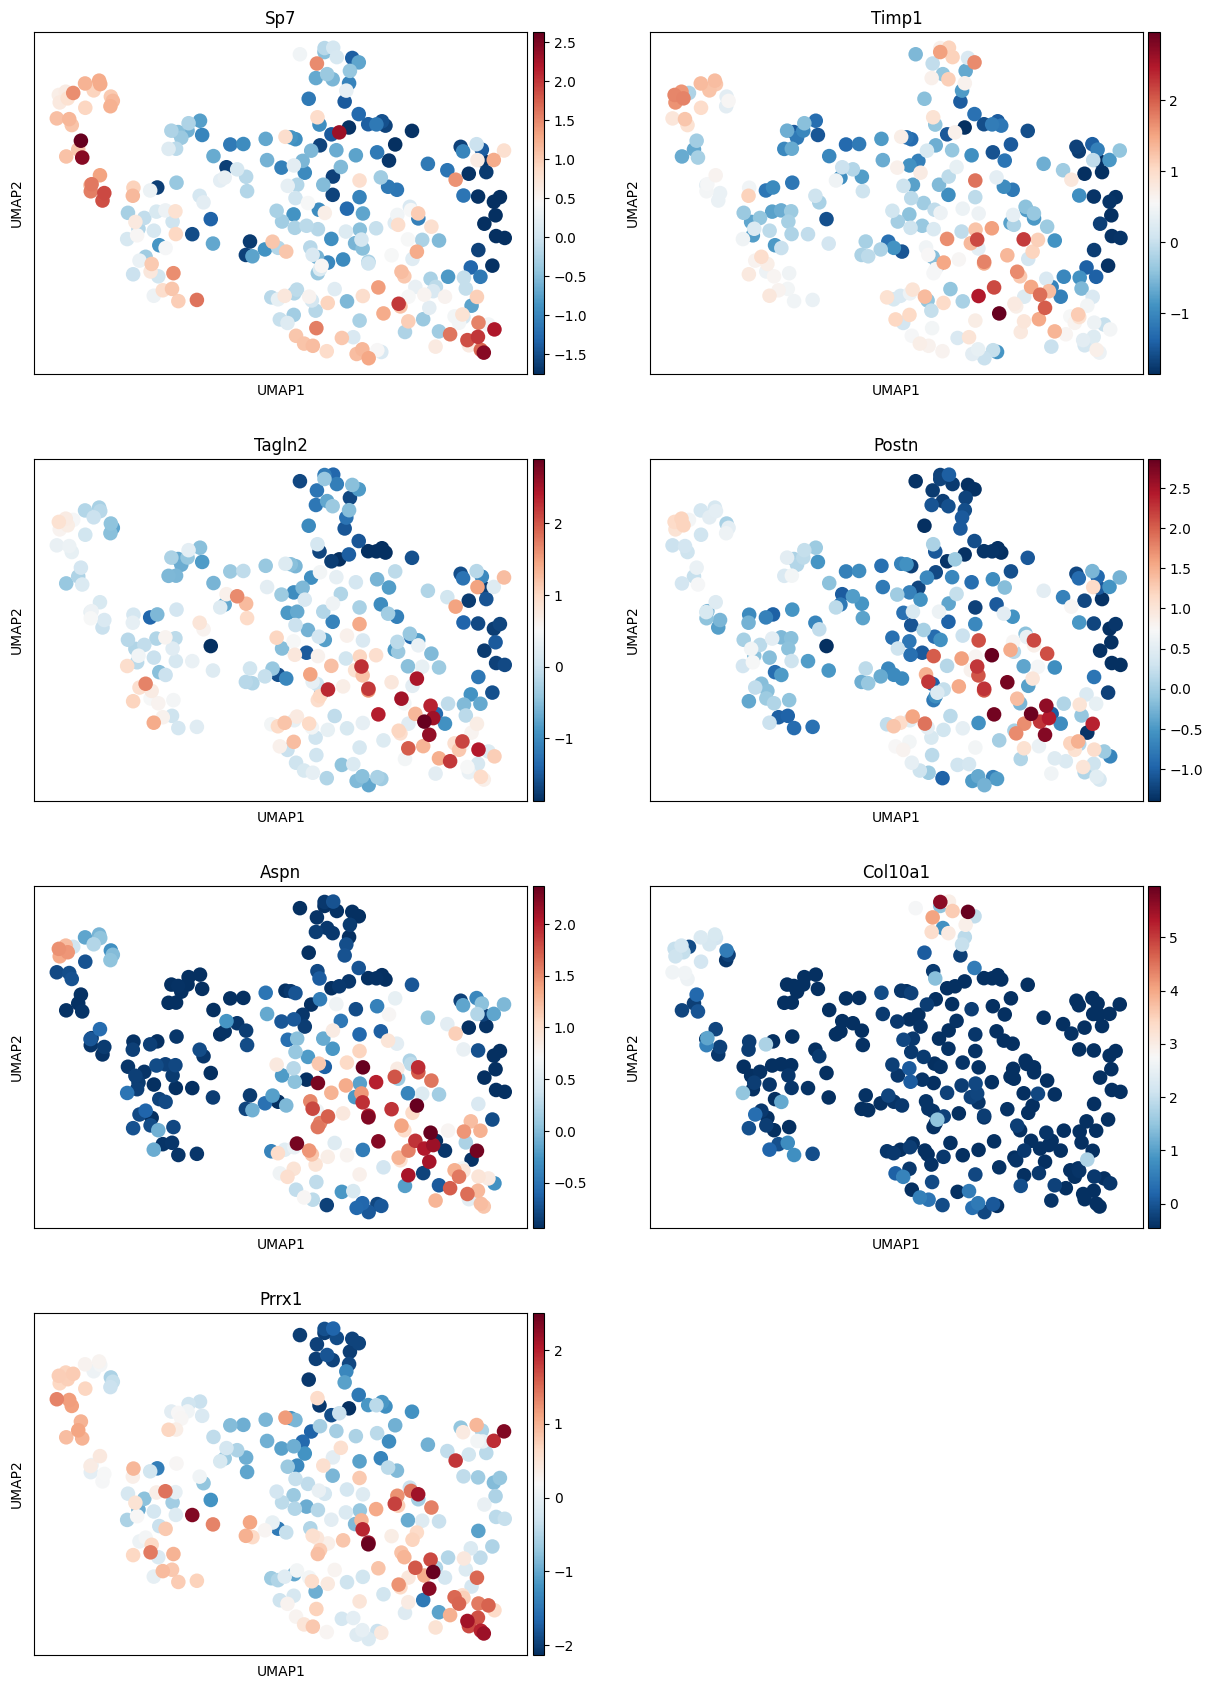

In [90]:
sc.pl.umap(expr,color=["Sp7","Timp1","Tagln2","Postn","Aspn","Col10a1","Prrx1"],ncols=2,cmap="RdBu_r")

In [133]:
sc.pl.umap(trav,color=["RAV_401","RAV_127","RAV_141","Stage"],ncols=2,cmap="RdBu_r")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [140]:
sc.pl.umap(trav,color=["RAV_444","RAV_71","RAV_12","Stage","Lineage","Core_or_Extand"],ncols=2,cmap="RdBu_r")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


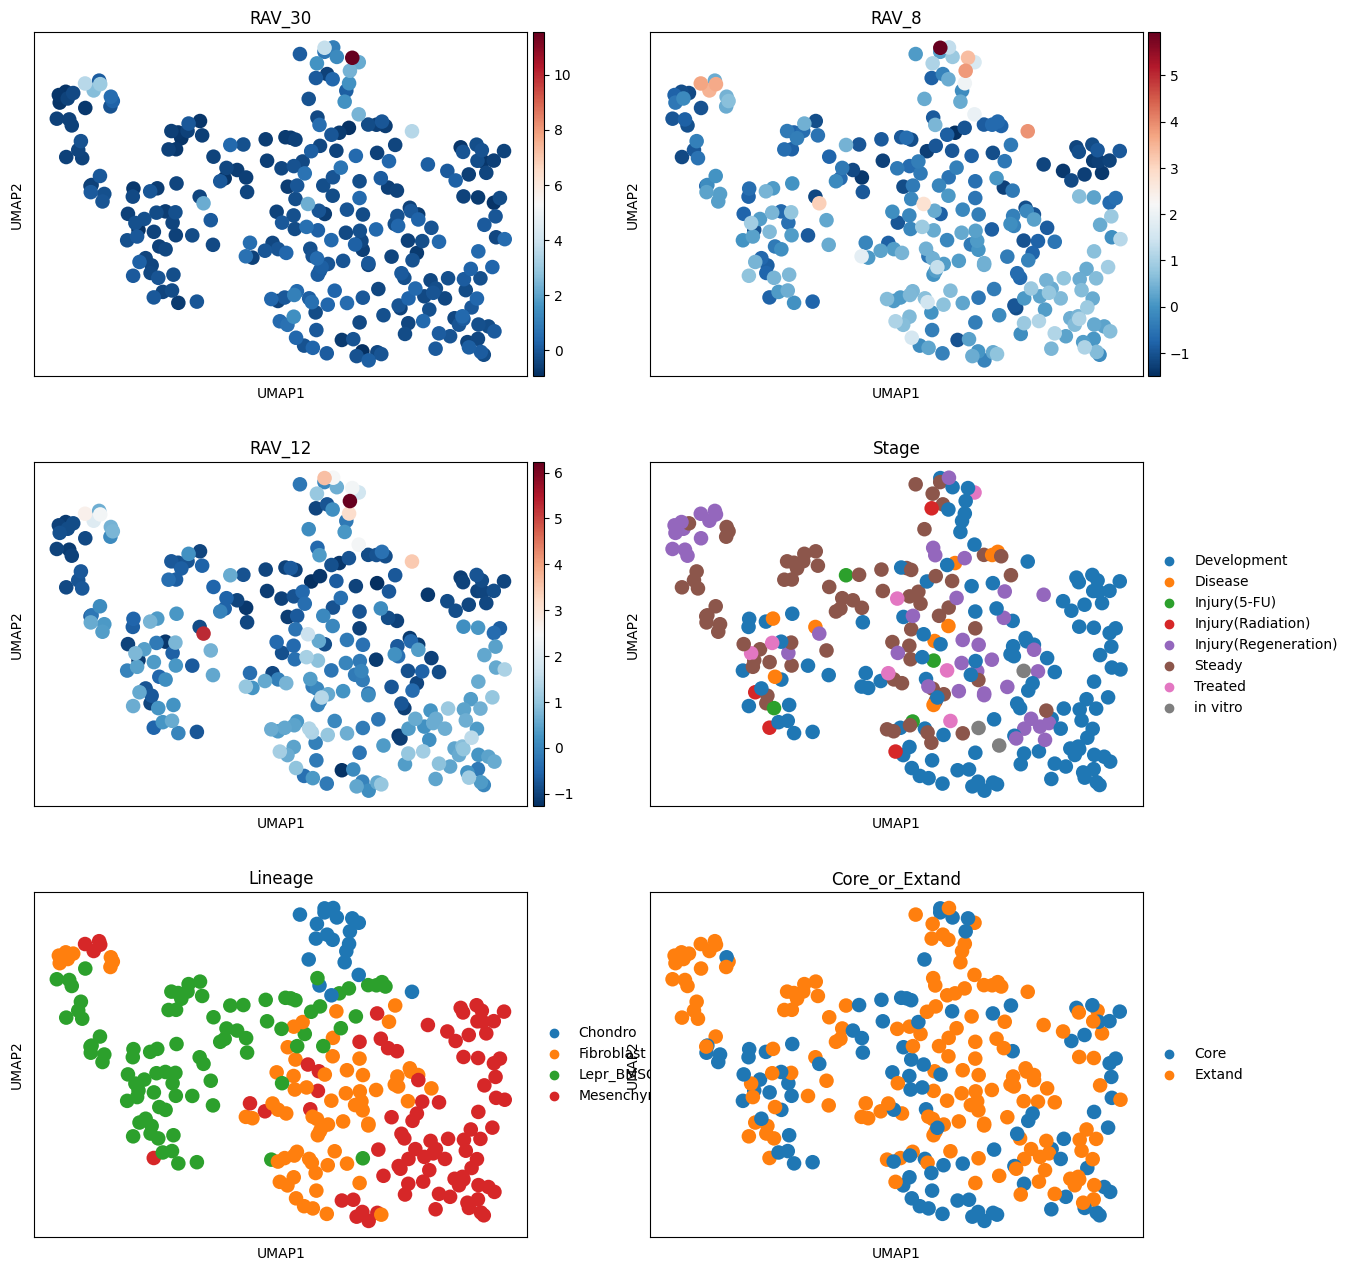

In [141]:
sc.pl.umap(trav,color=["RAV_30","RAV_8","RAV_12","Stage","Lineage","Core_or_Extand"],ncols=2,cmap="RdBu_r")

In [162]:
sc.pl.umap(trav,color=["RAV_315","Stage","Lineage","Core_or_Extand"],ncols=2,cmap="RdBu_r")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


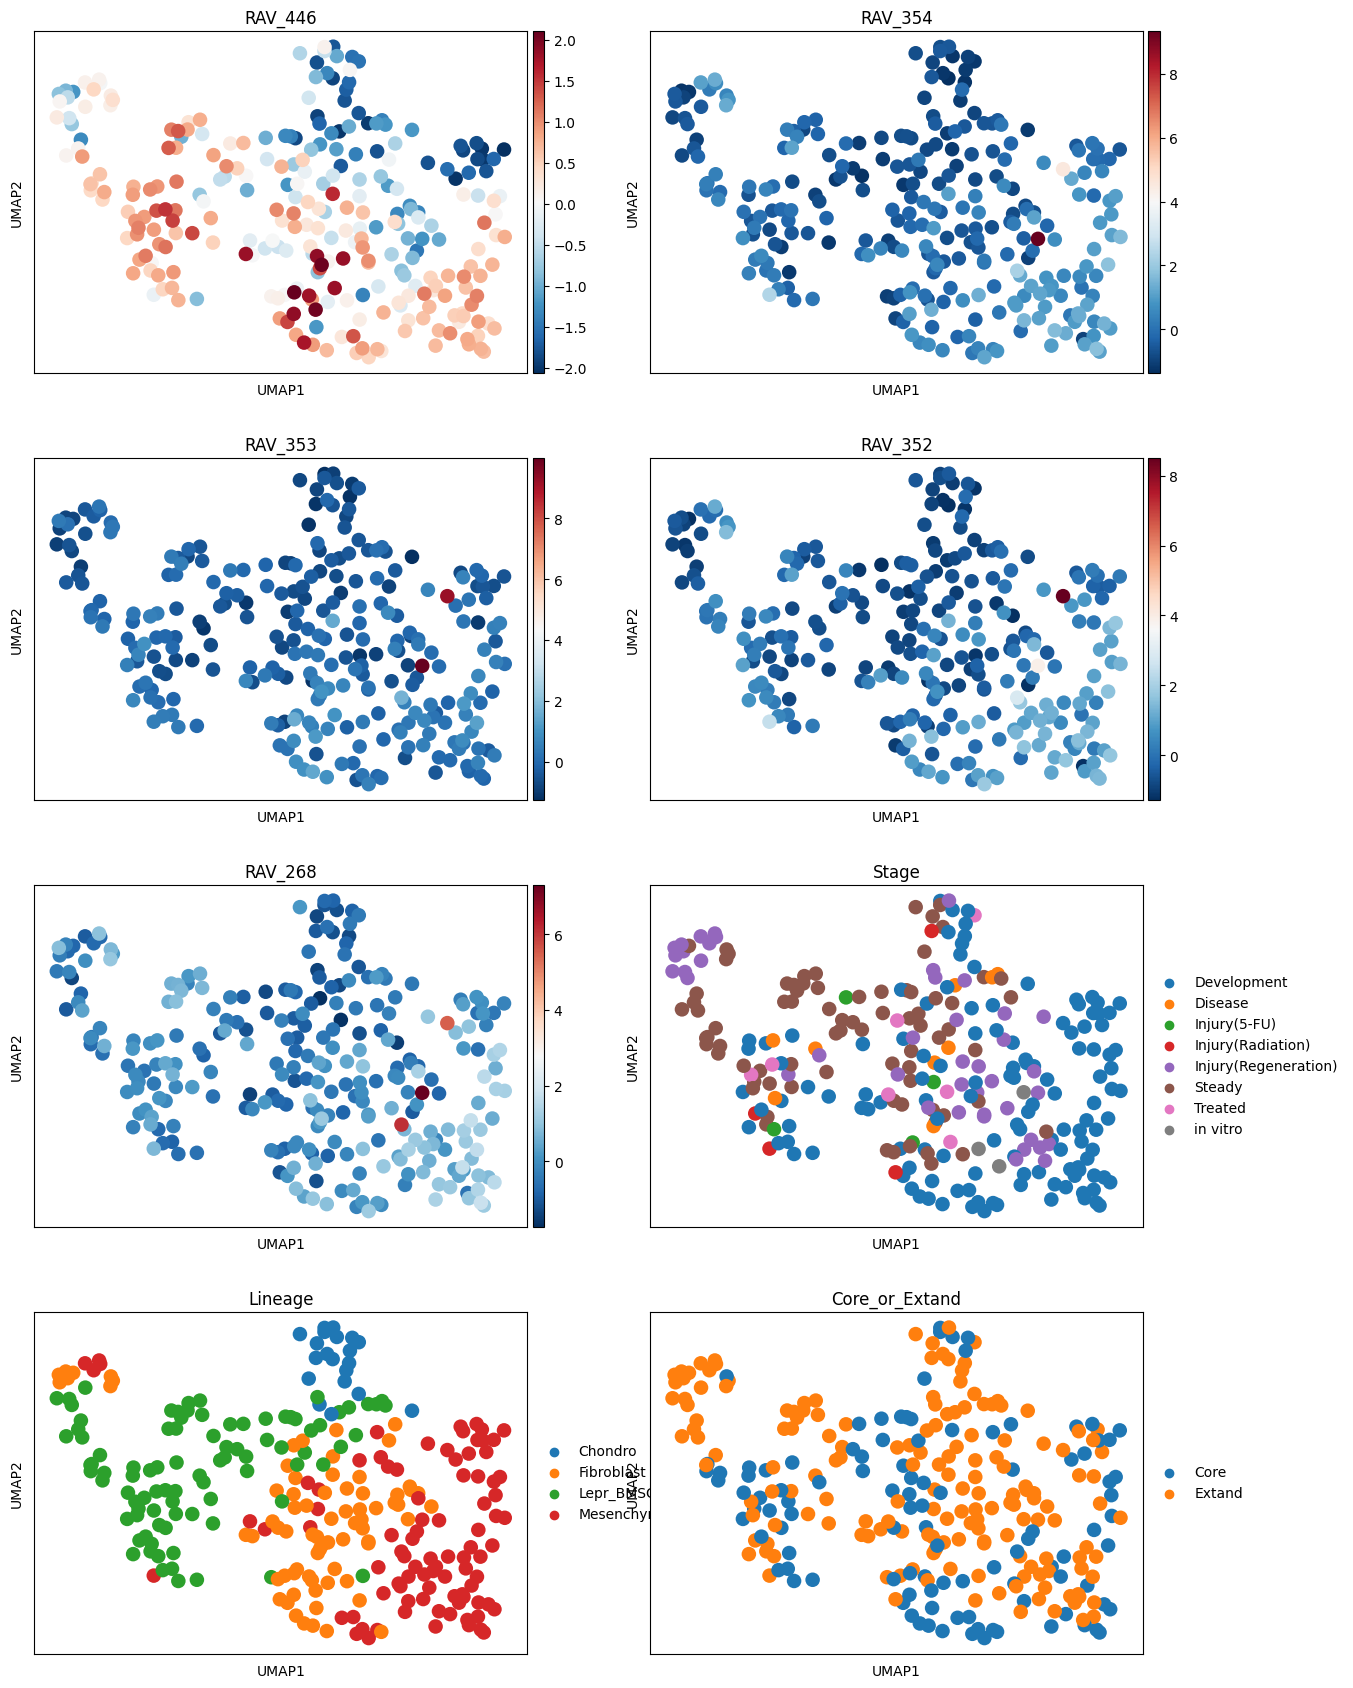

In [147]:
sc.pl.umap(trav,color=["RAV_446","RAV_354","RAV_353","RAV_352","RAV_268","Stage","Lineage","Core_or_Extand"],ncols=2,cmap="RdBu_r")

/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhanglab/mambaforge/envs/celloracle/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


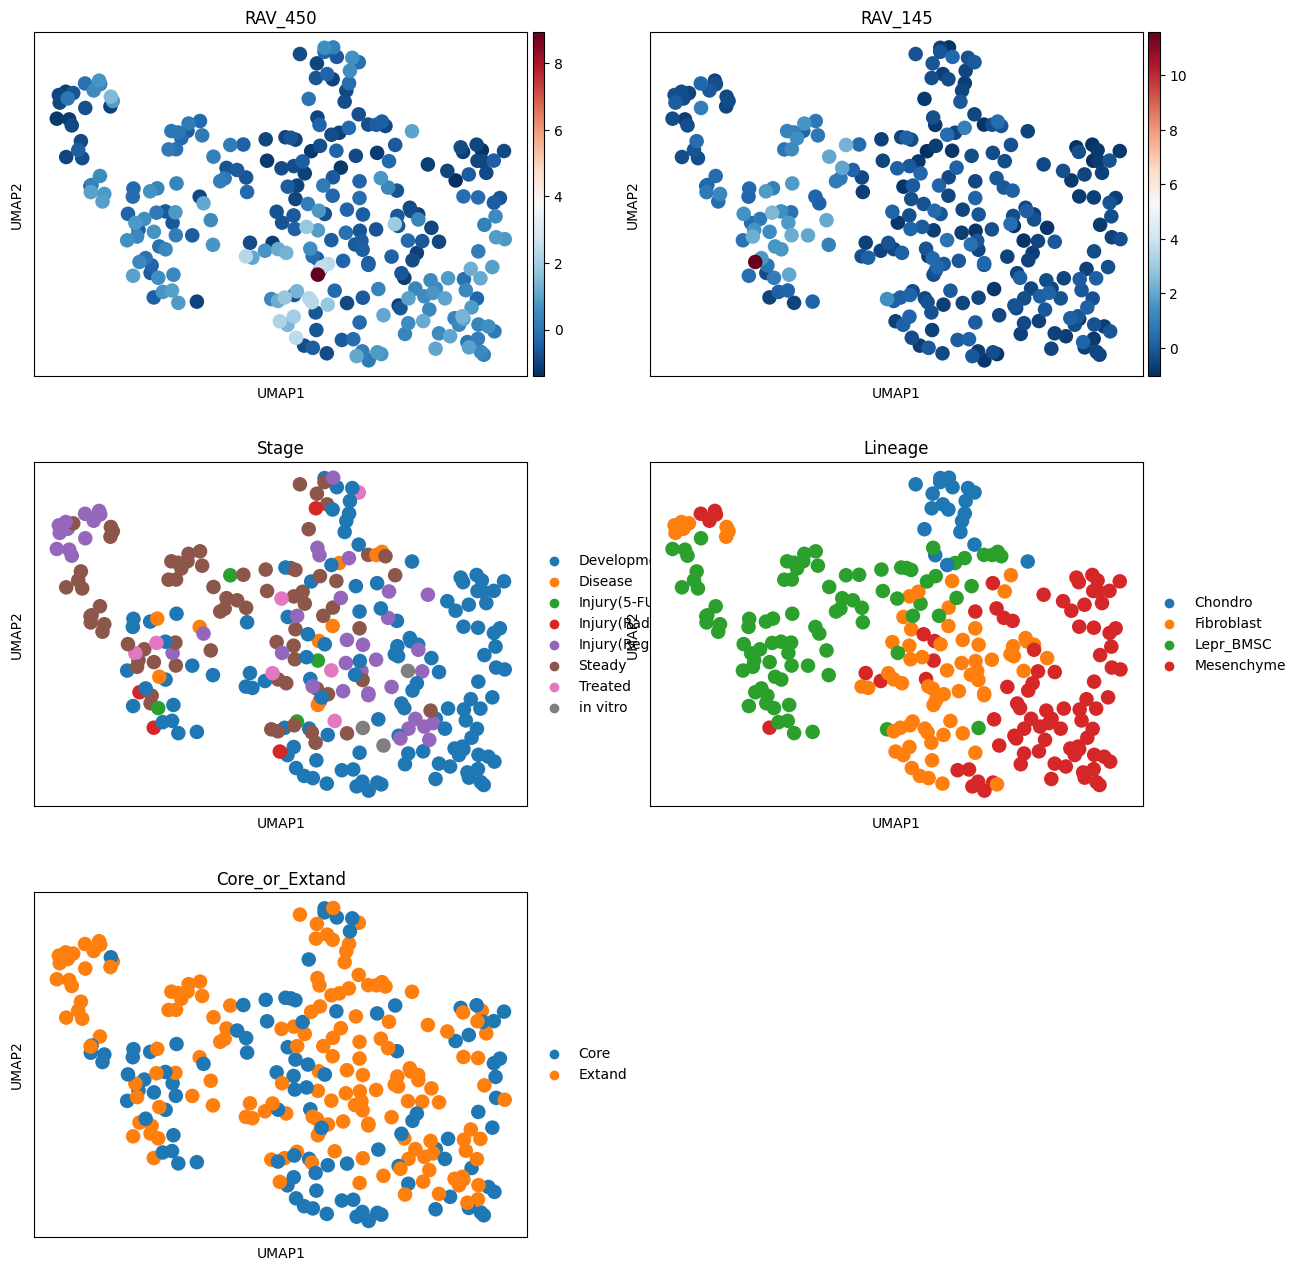

In [159]:
sc.pl.umap(trav,color=["RAV_450","RAV_145","Stage","Lineage","Core_or_Extand"],ncols=2,cmap="RdBu_r")